In [1]:
import pandas as pd
import numpy as np

### In this,we'll get insights of various fields across schema 

##### Question 1: What is the distribution of student enrollment across different courses?

In [2]:
info = pd.read_csv("C:/Users/Dell/Desktop/25 march/updated/stu_info.csv")

In [3]:
import matplotlib.pyplot as plt #Importing lib for visualization

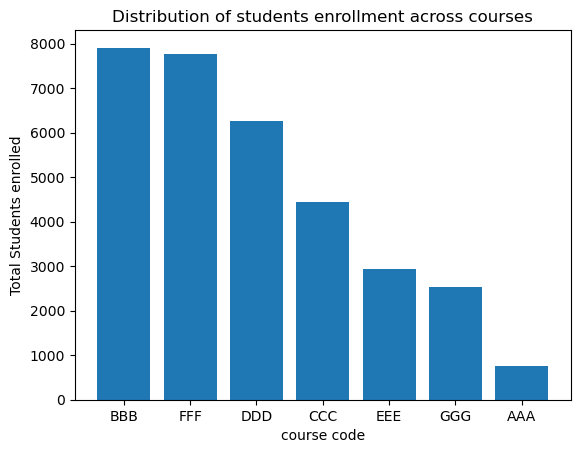

In [5]:
enrollment = info['code_module'].value_counts()
plt.bar(enrollment.index, enrollment.values)
plt.xlabel('course code')
plt.ylabel('Total Students enrolled')
plt.title('Distribution of students enrollment across courses')
plt.show()

- Here we can see that the most popular course is 'BBB' with almost 8000 renrollments 
- 'AAA' is the least popular with <1000 enrollments. 
- Whereas 'EEE' and 'GGG' have almost same enrollments

##### Question 2: What percentage of students are enrolled in more than 1 course?

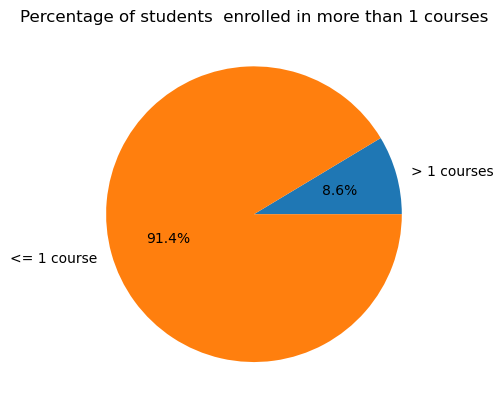

In [15]:
course_enroll= info.groupby('id_student')['code_module'].nunique()
more_than_1_courses= course_enroll[course_enroll > 1].count()
total_students = len(course_enroll)
plt.pie([more_than_1_courses, total_students - more_than_1_courses], labels = ['> 1 courses', '<= 1 course'], autopct='%1.1f%%')
plt.title('Percentage of students  enrolled in more than 1 courses')
plt.show()

- Majority of the students i.e.. 91.4% have opted only for 1 course. 
- 8.6% students have opted more than 1 course.

##### Question 3: What is the total number of students enrolled, broken down by gender, age band?

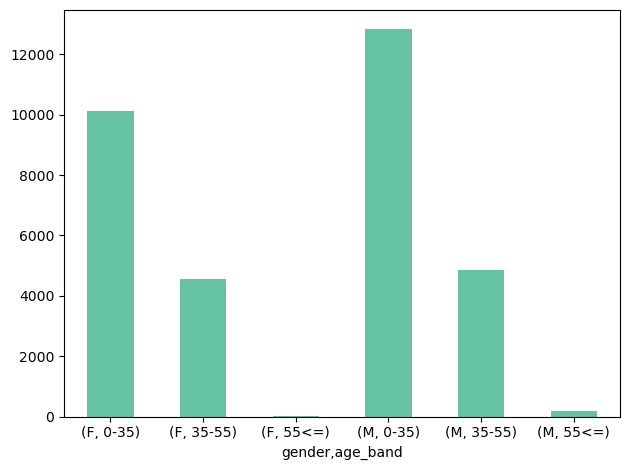

In [20]:
student_demo = info.groupby(['gender','age_band',]).size()
student_demo.plot(kind='bar', stacked = True, colormap= 'Set2')
plt.xlabel=('Age Band by Gender ')
plt.ylabel= ('Number of Students')
plt.title= ('Student Demographic distribution')
plt.xticks(rotation=0) #Rotating the x-axis labels for clear and better readability
plt.tight_layout()
plt.show()

- Majority of the students are in age band of 0-35 , wherein majority of this age band has male students. 
- Near to 0 Females are enrolled in course whose age band is above 55. Male population in this age band is also very less.

##### Question 4: What information is available about the courses in the Data?

In [22]:
assess = pd.read_csv("C:/Users/Dell/Desktop/25 march/updated/assessments.csv")
courses = pd.read_csv("C:/Users/Dell/Desktop/25 march/updated/courses.csv")

In [27]:
# Creating a joined merged table to get insights on the courses available
merged = pd.merge(info[['code_module', 'id_student']],assess[['code_module', 'assessment_type']], how= 'inner')

In [28]:
# Merging final column
Merged = pd.merge(merged,courses[['code_module', 'module_presentation_length']], how= 'inner')

In [29]:
Merged.head(5) # new temporary Table has been formed

,code_module,id_student,assessment_type,module_presentation_length
0,AAA,11391,TMA,268
1,AAA,11391,TMA,269
2,AAA,11391,TMA,268
3,AAA,11391,TMA,269
4,AAA,11391,TMA,268


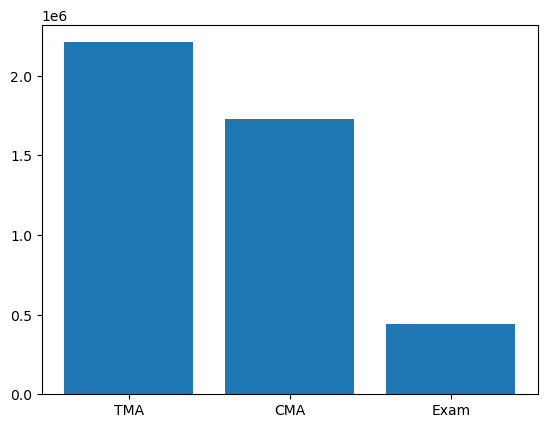

In [43]:
# Conditionally adding columns using .loc for assignment:
if 'module_presentation_length' in Merged.columns:
    course_info.loc[:, 'module_presentation_length'] = Merged['module_presentation_length']

if 'assessment_type' in Merged.columns:
    course_info.loc[:, 'assessment_type'] = Merged['assessment_type']

if 'assessment_type' in course_info.columns:
    assessment_counts = course_info['assessment_type'].value_counts()
    plt.bar(assessment_counts.index, assessment_counts.values)
    plt.show()
else:
    print("No 'assessment_type' column found in course_info. Consider merging or checking data.")


- There are 3 types of Assessments are present in the dataset i.e.. TMA, CMA and Exam.
- TMA holding the highest length whereas Exam holding the least length

## Conclusion:

In this analysis, we have seen that Most students are at a growth stage and BBB came out as the most famous course and TMA being the best and preffered Assessment method among enrollee. Though CMA is also close to being equally preffered. Here, we can also see that male population is more curious for the courses compared to females.Though there is a scope of both genders becoming equal in coming future